In [208]:
#installing the required libraries

import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
en = dt.datetime.now()
strt = dt.date(en.year-5,en.month,en.day)

In [210]:
# Getting the dataframes 

tesla = yf.download('TSLA',start = strt,end = en)
ford = yf.download('F',start = strt,end = en)
gm = yf.download('GM',start = strt,end = en)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [211]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-19,20.437332,20.769333,20.364668,20.375999,20.375999,62526000
2019-02-20,20.294001,20.420000,19.933332,20.170668,20.170668,107131500
2019-02-21,20.120667,20.216000,19.366667,19.415333,19.415333,133638000
2019-02-22,19.632668,19.766666,19.473333,19.647333,19.647333,86109000
2019-02-25,19.860666,20.193333,19.799999,19.917999,19.917999,99397500


In [212]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-19,8.53,8.85,8.53,8.83,7.033659,37929200
2019-02-20,8.83,8.98,8.82,8.94,7.121282,55316900
2019-02-21,8.94,8.96,8.70,8.71,6.938071,44730400
2019-02-22,8.73,8.75,8.56,8.71,6.938071,40947500
2019-02-25,8.77,8.85,8.75,8.76,6.977899,56615400


In [213]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-19,38.980000,39.680000,38.910000,39.529999,36.913628,9122200
2019-02-20,39.639999,40.099998,39.520000,39.950001,37.305832,9794800
2019-02-21,40.000000,40.200001,39.540001,39.619999,36.997669,7436000
2019-02-22,39.840000,40.009998,39.439999,39.990002,37.343185,6742300
2019-02-25,40.250000,40.459999,40.090000,40.139999,37.483253,9252300


In [214]:
# Finding only the 2023 data from the dataframes

tesla_2023 = tesla[tesla.index.year == 2023]
gm_2023 = gm[gm.index.year == 2023]
ford_2023 = ford[ford.index.year == 2023]

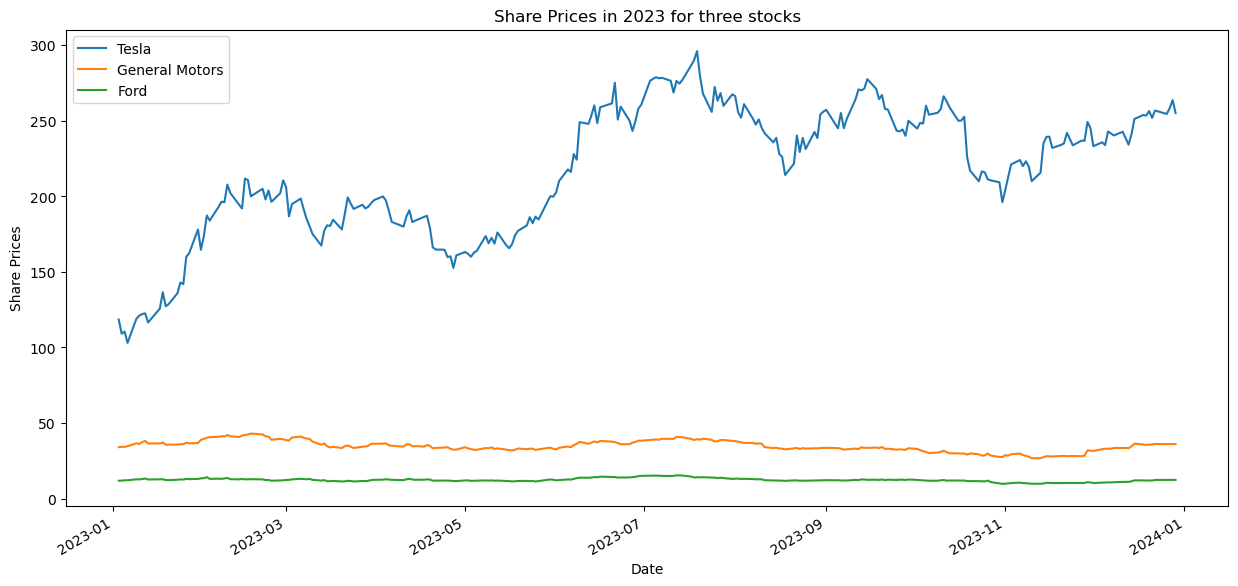

In [215]:
tesla_2023["Open"].plot(label='Tesla',figsize=(15,7))
gm_2023["Open"].plot(label='General Motors',figsize=(15,7))
ford_2023["Open"].plot(label='Ford',figsize=(15,7))
plt.legend()
plt.title('Share Prices in 2023 for three stocks')
plt.ylabel('Share Prices')
plt.show()

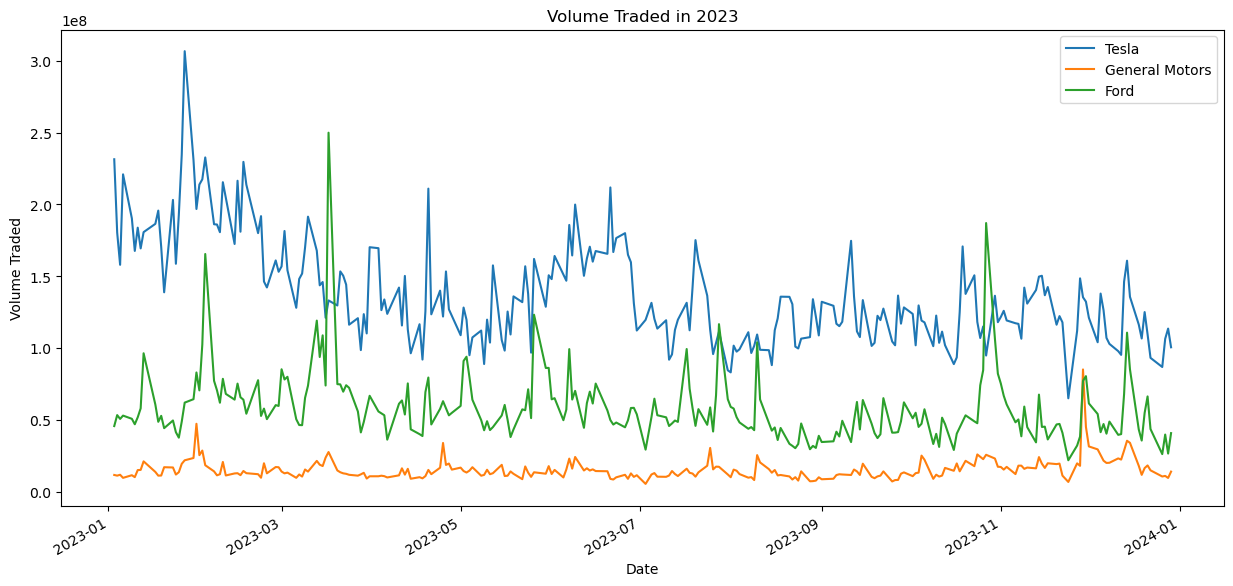

In [216]:
# Plotting the three share's volumes to understand the volume traded in the market

tesla_2023["Volume"].plot(label='Tesla',figsize=(15,7))
gm_2023["Volume"].plot(label='General Motors')
ford_2023["Volume"].plot(label='Ford')
plt.ylabel("Volume Traded")
plt.title('Volume Traded in 2023')
plt.legend()
plt.show()

In [217]:
# As the graph shows that Ford share a high volume in the month of March, let's try to dig deeper to find what was the reason:

ford_2023.iloc[[ford_2023['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-17,11.7,11.73,11.12,11.3,10.585303,249885100


In [218]:
# Find the row number for the date above

ford_2023.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,12.309600,12.475880,12.151320,12.318920,11.642792,5.807527e+07
std,1.162589,1.179252,1.164924,1.182624,1.059866,2.413618e+07
min,9.720000,9.870000,9.630000,9.700000,9.367246,2.202810e+07
25%,11.765000,11.930000,11.542500,11.750000,11.056779,4.464825e+07
50%,12.205000,12.370000,12.060000,12.200000,11.523383,5.288160e+07
75%,12.790000,13.002500,12.657500,12.890000,12.042232,6.511448e+07
max,15.370000,15.420000,15.200000,15.350000,14.558741,2.498851e+08


Text(0, 0.5, 'Share Price')

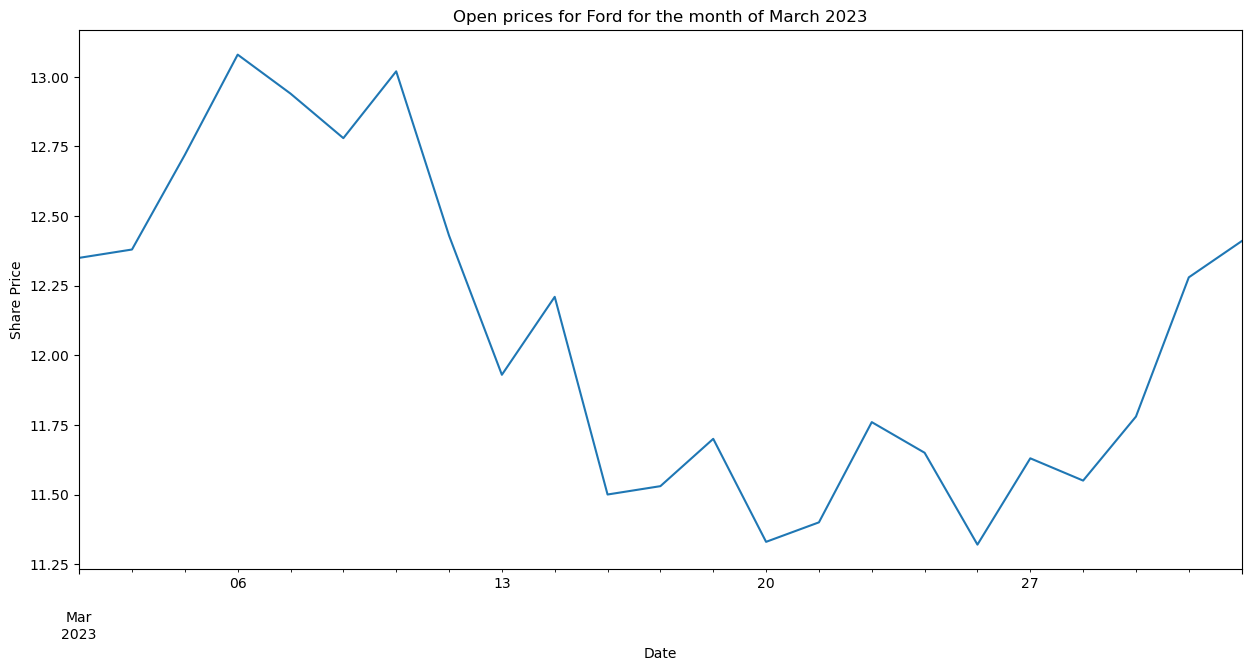

In [219]:
# How to select only a range of dates in the data set and only plot that range 

ford_2023.loc['2023-3-1':'2023-4-1']['Open'].plot(figsize=(15,7))
plt.title('Open prices for Ford for the month of March 2023')
plt.ylabel('Share Price')

In [220]:
# What all information can we get from the datasource ?

ford_mc = yf.Ticker("F")
ford_mc

yfinance.Ticker object <F>

In [221]:
# Finding all the information available about Ford from the source

ford_mc.info

{'address1': 'One American Road',
 'city': 'Dearborn',
 'state': 'MI',
 'zip': '48126',
 'country': 'United States',
 'phone': '313 322 3000',
 'website': 'https://www.ford.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Ford Motor Company develops, delivers, and services a range of Ford trucks, commercial cars and vans, sport utility vehicles, and Lincoln luxury vehicles worldwide. It operates through Ford Blue, Ford Model e, and Ford Pro; Ford Next; and Ford Credit segments. The company sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. It also engages in vehicle-related financing and leasing activities to and through automotive dealers. 

In [222]:
# Finding the financial Information available for the Ford Motor Company available directly in the ticker

ford_mc.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-43050000.0,-2184754000.0,2013390000.0,87480000.0
Tax Rate For Calcs,0.21,0.286,0.27,0.27
Normalized EBITDA,12013000000.0,12398000000.0,18086000000.0,7668000000.0
Total Unusual Items,-205000000.0,-7639000000.0,7457000000.0,324000000.0
Total Unusual Items Excluding Goodwill,-205000000.0,-7639000000.0,7457000000.0,324000000.0
Net Income From Continuing Operation Net Minority Interest,4347000000.0,-1981000000.0,17937000000.0,-1279000000.0
Reconciled Depreciation,6523000000.0,6493000000.0,5960000000.0,7457000000.0
Reconciled Cost Of Revenue,160031000000.0,140893000000.0,119903000000.0,121359000000.0
EBITDA,11808000000.0,4759000000.0,25543000000.0,7992000000.0
EBIT,5285000000.0,-1734000000.0,19583000000.0,535000000.0


# Here as we have sliced the main dataframe 'ford' to create 'ford_2023', if we do not use '.loc' we will encounter an error that will tell us that it can cause problems. Therefore we will use '.loc'.



In [256]:
# Refer to the comment above

ford_2023.loc[:,'Total Traded']= ford_2023['Volume'] * ford_2023['Open']



In [257]:
# I tried to run these three codes together, but there seems to be some problem therefore I have ran them separately

tesla_2023.loc[:,'Total Traded']= tesla_2023['Volume'] * tesla_2023['Open']

In [258]:
# I tried to run these three codes together, but there seems to be some problem therefore I have ran them separately

gm_2023.loc[:,'Total Traded']= gm_2023['Volume'] * gm_2023['Open']

In [259]:
tesla_2023.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,2.741429e+10
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,1.968224e+10
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,1.745907e+10
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,2.275384e+10
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,2.263618e+10


In [260]:
gm_2023.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2023-01-03,34.020000,34.340000,33.400002,33.820000,33.461422,11793300,4.012081e+08
2023-01-04,34.290001,34.950001,34.090000,34.689999,34.322193,11326300,3.883788e+08
2023-01-05,34.200001,35.439999,34.119999,35.000000,34.628914,11932000,4.080744e+08
2023-01-06,34.689999,36.009998,34.549999,35.910000,35.529263,9783500,3.393896e+08
2023-01-09,36.529999,36.840000,35.849998,35.919998,35.539154,11617900,4.244019e+08


In [261]:
ford_2023.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2023-01-03,11.82,11.92,11.57,11.68,10.292418,45809000,5.414624e+08
2023-01-04,11.88,12.08,11.74,12.01,10.583213,53429700,6.347448e+08
2023-01-05,12.11,12.38,11.88,12.25,10.794700,50785600,6.150136e+08
2023-01-06,12.12,12.59,12.10,12.58,11.085498,53089100,6.434399e+08
2023-01-09,12.74,12.93,12.55,12.69,11.182429,50865500,6.480265e+08


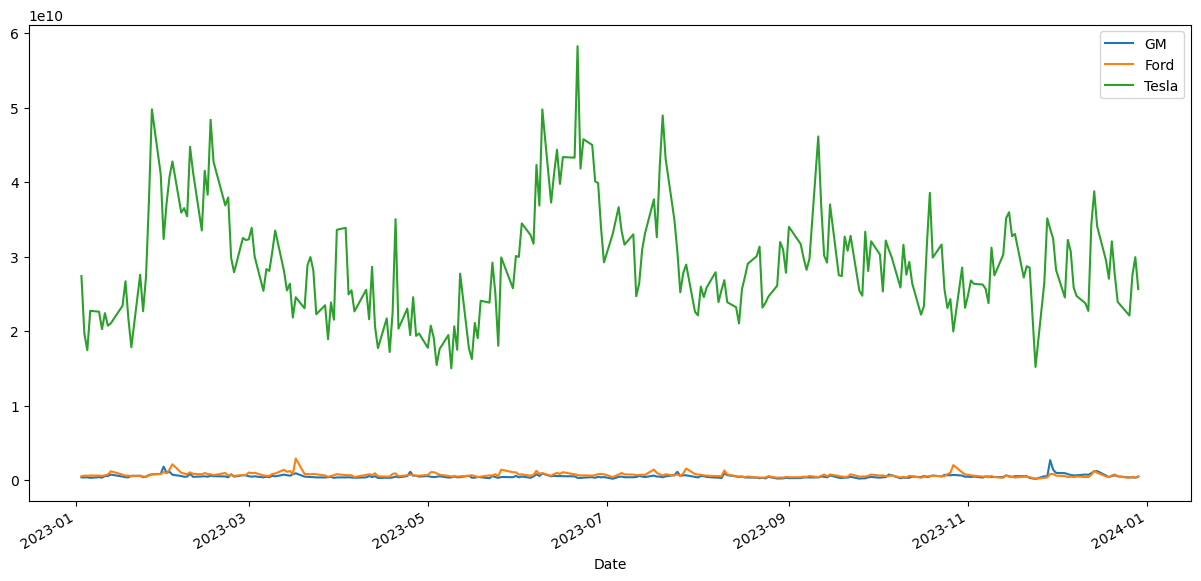

In [262]:
gm_2023['Total Traded'].plot(label='GM',figsize=(15,7))
ford_2023['Total Traded'].plot(label='Ford',figsize=(15,7))
tesla_2023['Total Traded'].plot(label="Tesla")
plt.legend()

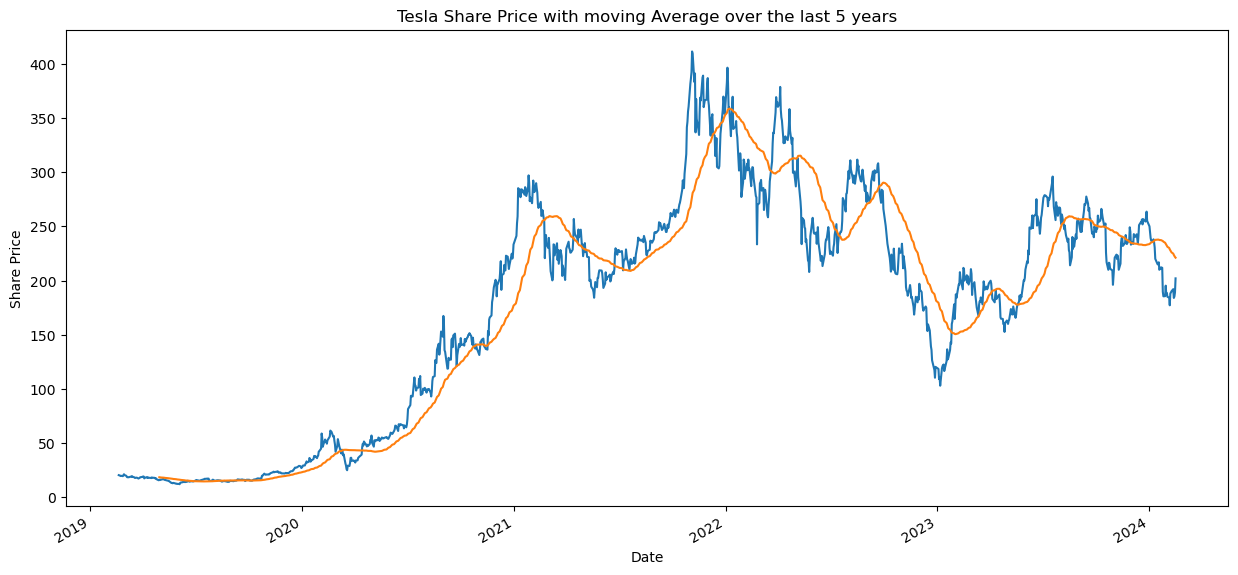

In [263]:
# Calculating moving averages for tesla

tesla['Open'].plot(label="Tesla",figsize=(15,7))

MA50 = tesla['Open'].rolling(50).mean().plot(label="Moving Average")
plt.title("Tesla Share Price with moving Average over the last 5 years")
plt.ylabel("Share Price")
plt.show()

# Now we are going to work on the Volatility of these different stocks and how they relate to each other.

In [264]:
# To find the volatility of different stocks, we will first find what the stock returns are:

tesla['Returns'] = (tesla["Close"]/tesla["Close"].shift(1))-1
ford['Returns'] = (ford["Close"]/ford["Close"].shift(1))-1
gm['Returns'] = (gm["Close"]/gm["Close"].shift(1))-1


In [265]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-02-19,20.437332,20.769333,20.364668,20.375999,20.375999,62526000,NaN
2019-02-20,20.294001,20.420000,19.933332,20.170668,20.170668,107131500,-0.010077
2019-02-21,20.120667,20.216000,19.366667,19.415333,19.415333,133638000,-0.037447
2019-02-22,19.632668,19.766666,19.473333,19.647333,19.647333,86109000,0.011949
2019-02-25,19.860666,20.193333,19.799999,19.917999,19.917999,99397500,0.013776


In [266]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-02-19,38.980000,39.680000,38.910000,39.529999,36.913628,9122200,NaN
2019-02-20,39.639999,40.099998,39.520000,39.950001,37.305832,9794800,0.010625
2019-02-21,40.000000,40.200001,39.540001,39.619999,36.997669,7436000,-0.008260
2019-02-22,39.840000,40.009998,39.439999,39.990002,37.343185,6742300,0.009339
2019-02-25,40.250000,40.459999,40.090000,40.139999,37.483253,9252300,0.003751


In [267]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-02-19,8.53,8.85,8.53,8.83,7.033659,37929200,NaN
2019-02-20,8.83,8.98,8.82,8.94,7.121282,55316900,0.012457
2019-02-21,8.94,8.96,8.70,8.71,6.938071,44730400,-0.025727
2019-02-22,8.73,8.75,8.56,8.71,6.938071,40947500,0.000000
2019-02-25,8.77,8.85,8.75,8.76,6.977899,56615400,0.005741


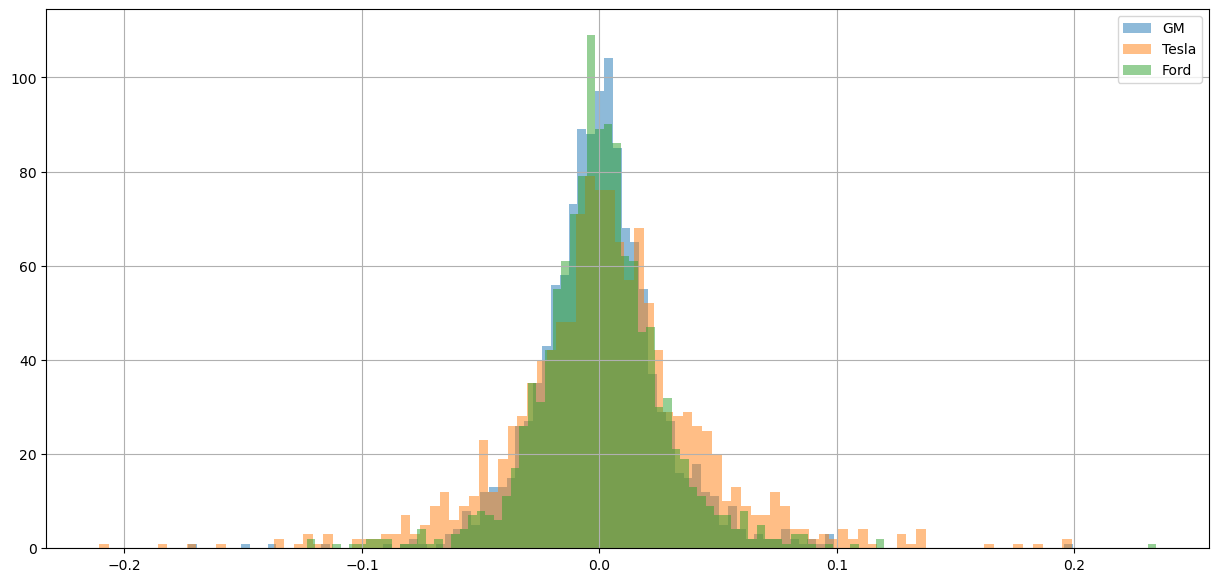

In [268]:
# Now we will plot the returns to understand the variance of the returns. Here alpha = 0.5 is used to make the graphs transparts

gm["Returns"].hist(bins=100,label="GM",alpha=0.5,figsize=(15,7))
tesla["Returns"].hist(bins=100,label="Tesla",alpha=0.5)
ford["Returns"].hist(bins=100,label="Ford",alpha=0.5)

plt.legend()
plt.show()

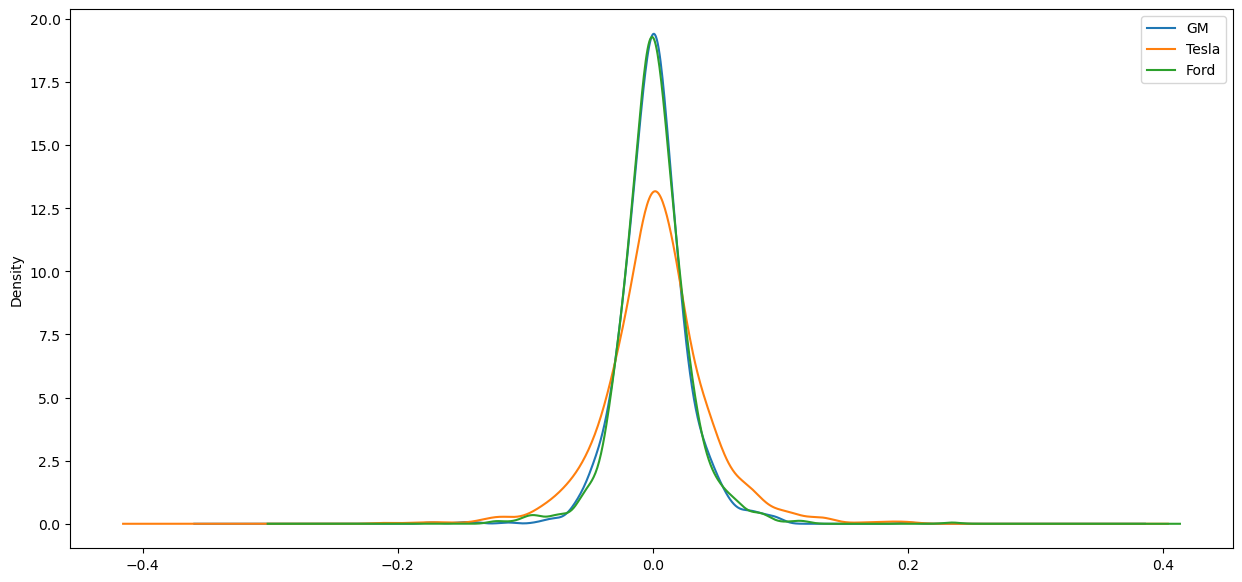

In [269]:
# Now we will normalise the Variance so that it makes more sense and understand the variance better

gm["Returns"].plot(kind='kde',label='GM',figsize = (15,7))
tesla["Returns"].plot(kind='kde',label='Tesla')
ford["Returns"].plot(kind='kde',label='Ford')
plt.legend()
plt.show()


# Now we are going to find the Beta of the stocks using regression

In [315]:
# Imported the SNP500 data to find the returns for the 5 years

snp = yf.download('^GSPC',start = strt,end = en)
snp.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000
2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000
2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000
2024-02-15,5003.140137,5032.720215,4999.439941,5029.729980,5029.729980,4137970000
2024-02-16,5031.129883,5038.700195,4999.520020,5005.569824,5005.569824,3833270000


In [316]:
# In this regression method we are using the .pct_change() method to find the daily returns of the stock

Daily_SNP_Returns = snp["Adj Close"].pct_change()

# Removing the first rows as they would have nan Values

Daily_SNP_Returns = Daily_SNP_Returns.dropna(axis = 0)

Daily_SNP_Returns.head()

Date
2019-02-20    0.001777
2019-02-21   -0.003526
2019-02-22    0.006411
2019-02-25    0.001232
2019-02-26   -0.000790
Name: Adj Close, dtype: float64

In [317]:
# Converting the series into a dataframe 

Daily_SNP_Returns = Daily_SNP_Returns.to_frame(name = 'DR for SNP')
Daily_SNP_Returns.head()

,DR for SNP
Date,
2019-02-20,0.001777
2019-02-21,-0.003526
2019-02-22,0.006411
2019-02-25,0.001232
2019-02-26,-0.000790


In [318]:
# Now we are going to repeat the same methods for all the three stocks

In [319]:
Daily_Tesla_R = tesla["Adj Close"].pct_change()
Daily_Tesla_R = Daily_Tesla_R.dropna(axis=0)
Daily_Tesla_R = Daily_Tesla_R.to_frame(name="DR for Tesla")
Daily_Tesla_R.head()

,DR for Tesla
Date,
2019-02-20,-0.010077
2019-02-21,-0.037447
2019-02-22,0.011949
2019-02-25,0.013776
2019-02-26,-0.003046


In [320]:
# Find the daily returns for ford

Daily_Ford_R = ford['Adj Close'].pct_change().dropna(axis=0).to_frame(name="DR for Ford")
Daily_Ford_R.head()

,DR for Ford
Date,
2019-02-20,0.012458
2019-02-21,-0.025727
2019-02-22,0.000000
2019-02-25,0.005740
2019-02-26,0.013699


In [348]:
# Finding the returns for GM

Daily_GM_R = gm['Adj Close'].pct_change().dropna(axis=0).to_frame(name="DR for GM")
Daily_GM_R.head()

,DR for GM
Date,
2019-02-20,0.010625
2019-02-21,-0.008260
2019-02-22,0.009339
2019-02-25,0.003751
2019-02-26,-0.000747


In [349]:
# Joining all the separate Dataframes to create a new table so that we can do further analysis

df = Daily_GM_R.join(Daily_Ford_R.join(Daily_SNP_Returns.join(Daily_Tesla_R,how='inner'),how='inner'),how='inner')
df.head()

,DR for GM,DR for Ford,DR for SNP,DR for Tesla
Date,,,,
2019-02-20,0.010625,0.012458,0.001777,-0.010077
2019-02-21,-0.008260,-0.025727,-0.003526,-0.037447
2019-02-22,0.009339,0.000000,0.006411,0.011949
2019-02-25,0.003751,0.005740,0.001232,0.013776
2019-02-26,-0.000747,0.013699,-0.000790,-0.003046


# Beta Calculation of Tesla, Ford, and GM Relative to the S&P 500

In [350]:
import statsmodels.api as sm

In [351]:
x1 = df["DR for SNP"]
y = df["DR for Ford"]

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DR for Ford   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     711.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          1.36e-124
Time:                        01:15:51   Log-Likelihood:                 3031.5
No. Observations:                1258   AIC:                            -6059.
Df Residuals:                    1256   BIC:                            -6049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.212      0.832      -0.001       0.001
DR for SNP     1.2238      0.046     26.678      0.000       1.134       1.314
==============================================================================
Omnibus:                      151.945   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1437.976
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       8.236   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
## Plotting the regression line

import seaborn as sns

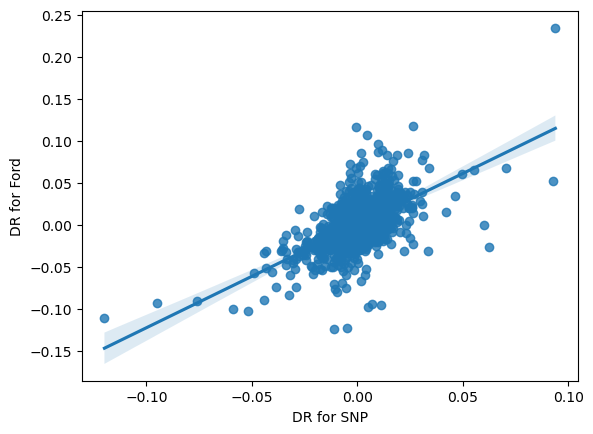

In [353]:
sns.regplot(x='DR for SNP', y = 'DR for Ford',data = df)
plt.show()

# 

# As there are a lot of data points, let's try to how the results change if we use monthly returns in place of daily returns

In [355]:
# Joining all the returns together to make a table of returns

ts1 = tesla["Adj Close"].to_frame("Tesla Returns")
fr1 = ford["Adj Close"].to_frame("Ford Returns")
gm1 =gm["Adj Close"].to_frame("GM Returns")
snp1 = snp["Adj Close"].to_frame("SNP Returns")

df_MR = snp1.join(fr1.join(gm1.join(ts1)))
df_MR.head()

,SNP Returns,Ford Returns,GM Returns,Tesla Returns
Date,,,,
2019-02-19,2779.760010,7.033659,36.913628,20.375999
2019-02-20,2784.699951,7.121282,37.305832,20.170668
2019-02-21,2774.879883,6.938071,36.997669,19.415333
2019-02-22,2792.669922,6.938071,37.343185,19.647333
2019-02-25,2796.110107,6.977899,37.483253,19.917999


In [357]:
# Now we will find only the returns of the stock and the market for further analysis

df_MR = df_MR.resample('M').ffill().pct_change()
df_MR.head()

,SNP Returns,Ford Returns,GM Returns,Tesla Returns
Date,,,,
2019-02-28,NaN,NaN,NaN,NaN
2019-03-31,0.017924,0.001140,-0.050958,-0.125109
2019-04-30,0.039313,0.209299,0.049865,-0.147109
2019-05-31,-0.065778,-0.088995,-0.144031,-0.224266
2019-06-30,0.068930,0.074580,0.168053,0.206848


In [379]:
# Now we will remove the NaN values

df_MR = df_MR.dropna(axis=0)
df_MR.head()

,SNP Returns,Ford Returns,GM Returns,Tesla Returns
Date,,,,
2019-03-31,0.017924,0.001140,-0.050958,-0.125109
2019-04-30,0.039313,0.209299,0.049865,-0.147109
2019-05-31,-0.065778,-0.088995,-0.144031,-0.224266
2019-06-30,0.068930,0.074580,0.168053,0.206848
2019-07-31,0.013128,-0.054522,0.046976,0.081223


In [380]:
# Now we will try to find the regression values for the Ford Company and we can check that the beta we are getting is same as the beta on Yahoo Finance

x1 = df_MR["SNP Returns"]
y = df_MR["Ford Returns"]

x = sm.add_constant(x1)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Ford Returns   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     44.38
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.08e-08
Time:                        01:33:47   Log-Likelihood:                 54.354
No. Observations:                  60   AIC:                            -104.7
Df Residuals:                      58   BIC:                            -100.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0003      0.013     -0.024      0.981      -0.027       0.026
SNP Returns     1.6354      0.246      6.662      0.000       1.144       2.127
==============================================================================
Omnibus:                        3.806   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.651
Skew:                           0.593   Prob(JB):                        0.161
Kurtosis:                       2.769   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

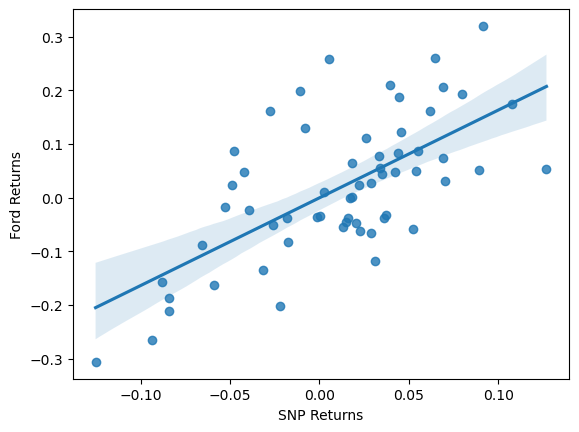

In [384]:
sns.regplot(x='SNP Returns', y = 'Ford Returns',data = df_MR)
plt.show()

In [381]:
# For Tesla

x1 = df_MR["SNP Returns"]
y = df_MR["Tesla Returns"]

x = sm.add_constant(x1)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tesla Returns   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     28.06
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.89e-06
Time:                        01:36:35   Log-Likelihood:                 16.892
No. Observations:                  60   AIC:                            -29.78
Df Residuals:                      58   BIC:                            -25.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0328      0.025      1.339      0.186      -0.016       0.082
SNP Returns     2.4282      0.458      5.298      0.000       1.511       3.346
==============================================================================
Omnibus:                        4.453   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.479
Skew:                           0.481   Prob(JB):                        0.176
Kurtosis:                       3.681   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

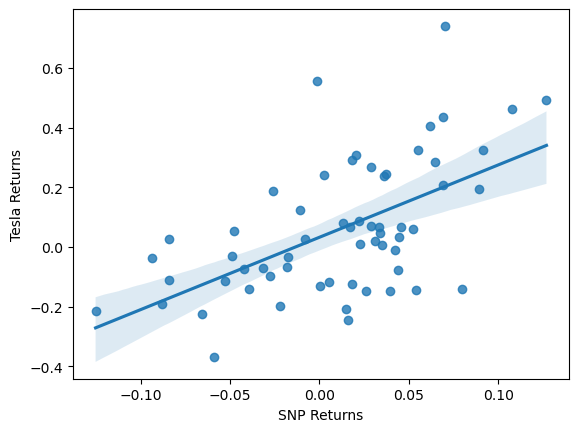

In [385]:
sns.regplot(x='SNP Returns', y = 'Tesla Returns',data = df_MR)
plt.show()

In [382]:
# For GM

x1 = df_MR["SNP Returns"]
y = df_MR["GM Returns"]

x = sm.add_constant(x1)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GM Returns   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     49.38
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.64e-09
Time:                        01:36:51   Log-Likelihood:                 62.852
No. Observations:                  60   AIC:                            -121.7
Df Residuals:                      58   BIC:                            -117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0092      0.011     -0.811      0.421      -0.032       0.014
SNP Returns     1.4974      0.213      7.027      0.000       1.071       1.924
==============================================================================
Omnibus:                        4.300   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.748
Skew:                           0.611   Prob(JB):                        0.153
Kurtosis:                       3.085   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

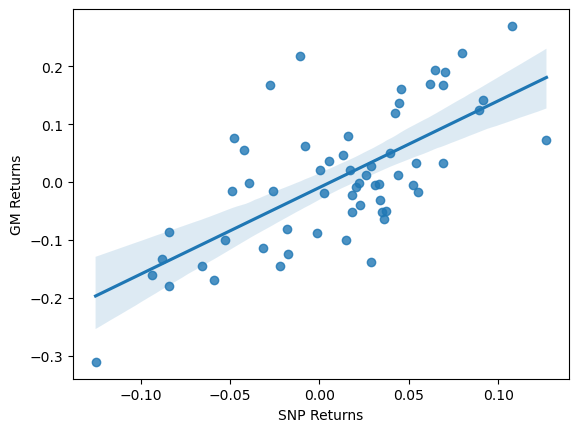

In [386]:
sns.regplot(x='SNP Returns', y = 'GM Returns',data = df_MR)
plt.show()